<a href="https://colab.research.google.com/github/MOUADASSILA/AI-Diabetes-Prediction-Project/blob/main/diyabetProjectAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hado homa 4 bibs l asasiyin l aya project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#bach n9sam data l 2 parts wahad train o lakhor tst
from sklearn.model_selection import train_test_split

#algorithms li ghadi i trainiw lina 3la data
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#hado homa l metrics li ghadi n9iss bihom chhal kafa2a dial 4 li fo9hom
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score , f1_score
from sklearn.metrics import classification_report

#bach nwazn gal data diali dengesiz
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#kanchofo rslt l 9dima ki kant o hta jdida
from collections import Counter

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')



In [ ]:
#kan9ra data diali
dataset = pd.read_csv(r'/content/sample_data/diabetes.csv')


In [ ]:
#bach nchof data diali (had l 9aws. bach tla3 dakchi n9i9i - kon madrtouch ghadi tla3 lia bkharb9a bhal li writ l yuba)
dataset.head(1000)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#charha rassha
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#hna chft wach kayna chi haja mdoubla o dik .sum bach yjma3ha lia
dataset.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool>

# *Analysis*

In [ ]:
 #l3ala9a ola irtibat bin l3amdan
 dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

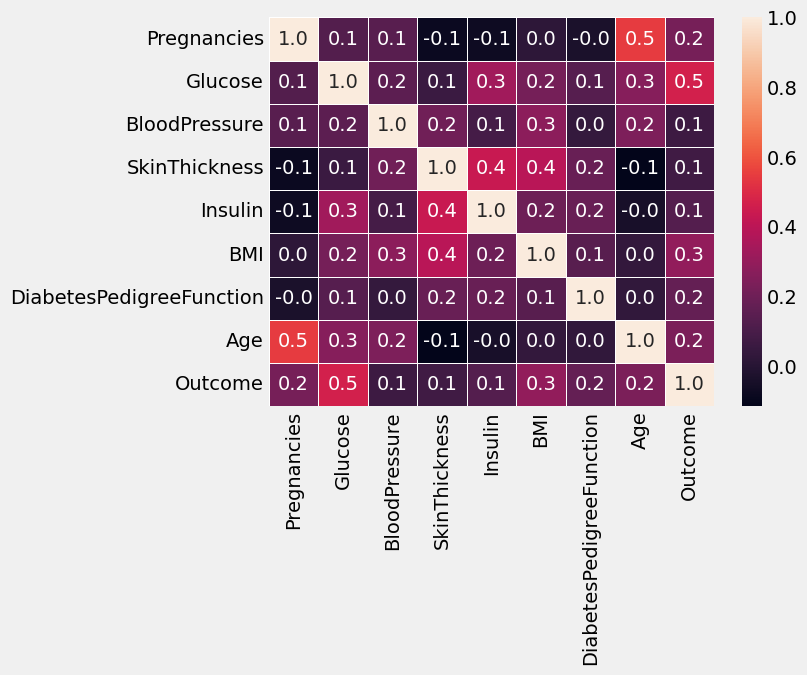

In [ ]:
#nfs li lfo9 ms bayn ktar o dik annot katzid hta rakm machi gha loun
sns.heatmap(dataset.corr(),annot = True , fmt="0.1f" , linewidth=.5)

<Axes: xlabel='Outcome', ylabel='count'>

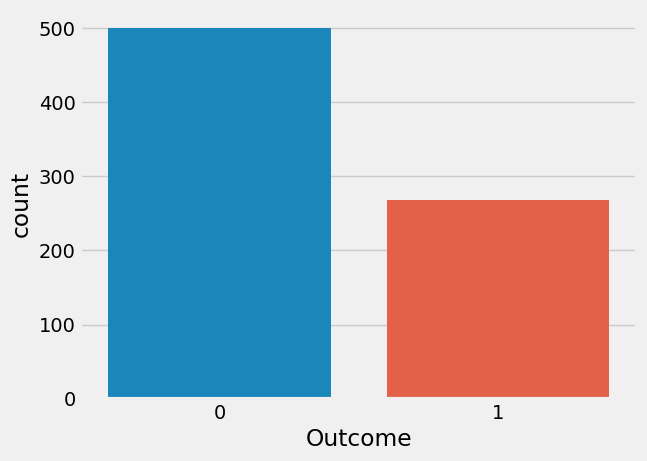

In [ ]:
#bach nchof chhal mn wahad mdir o chhal la
sns.countplot(x="Outcome" , data=dataset)

In [ ]:
max=dataset[dataset["Outcome"]==0]
min=dataset[dataset["Outcome"]==1]
max.shape , min.shape
268/(500+268)

0.3489583333333333

# Creat **Model**

In [ ]:
#9assamna data bin x o y - ga3 data x illa saf lakhar ila y
x=dataset.drop("Outcome", axis = 1) #ga3 data illa outcome
y=dataset["Outcome"]

In [ ]:
#katabat nisba data li kayakhodha kol mara doc accurcy makatbadalch
#dengasiz problemi
rm=RandomOverSampler(random_state=41)
x_res , y_res = rm.fit_resample(x,y)

In [ ]:
print("old dataset shape{}" .format(Counter(y)))
print("old dataset shape{}" .format(Counter(y_res)))

old dataset shapeCounter({0: 500, 1: 268})
old dataset shapeCounter({1: 500, 0: 500})


In [ ]:
#9assamna l x-y.train o x-y.test b function li derna l fo9 dial train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2) #.2 hia 20%

In [ ]:

model1=LogisticRegression()
model2=SVC()
model3=RandomForestClassifier(n_estimators=100 , class_weight="balanced")
model4=GradientBoostingClassifier(n_estimators=1000)


In [ ]:
col=["LogisticRegression ,SVC,RandomForestClassifier,GradientBoostingClassifier"]
result1=[]
result2=[]
result3=[]

# nsaybo function li smitha **model**

In [ ]:
def cal(model): #bach nbda n3ayat 3la model o ydir lia hadchi li lta7t

  #kangolih ytrini lia 3la data li f x_train o y_train
  model.fit(x_train,y_train)

  #mora matrina db ytnaba2 b natija dial x
  pre=model.predict(x_test)

  #nchof tawa9o3 dalo chhal s7i7 parrapot l y
  accuracy=accuracy_score(pre,y_test)
  recall=recall_score(pre,y_test)
  f1=f1_score(pre,y_test)

  result1.append(accuracy)
  result2.append(recall)
  result3.append(f1)


  # hna ghadi i3tina output fiha tp tn fp fn
  sns.heatmap(confusion_matrix(pre,y_test),annot= True)

  print(model)
  print("accuracy is :",accuracy)
  print("recall is :", recall)
  print("f1 is :",f1)


LogisticRegression()
accuracy is : 0.7857142857142857
recall is : 0.7
f1 is : 0.6796116504854369


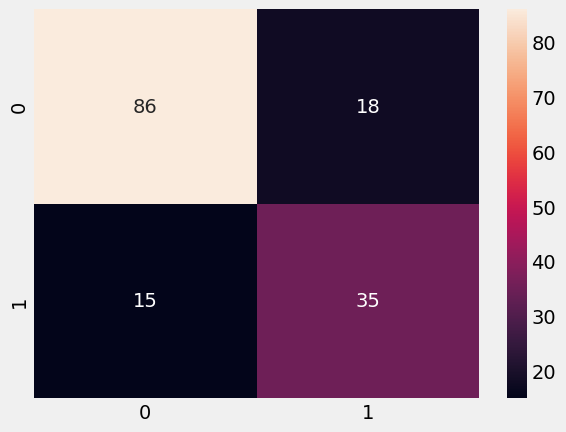

In [ ]:
cal(model1)

SVC()
accuracy is : 0.7532467532467533
recall is : 0.6744186046511628
f1 is : 0.6041666666666666


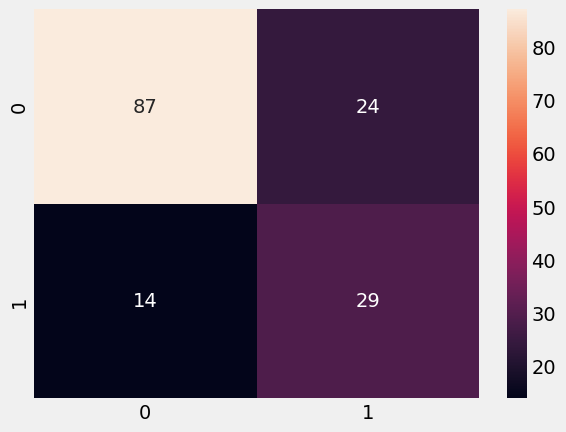

In [ ]:
cal(model2)

RandomForestClassifier(class_weight='balanced')
accuracy is : 0.7532467532467533
recall is : 0.6666666666666666
f1 is : 0.6122448979591837


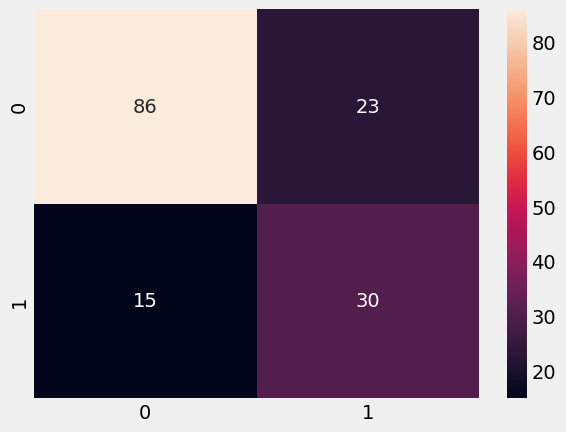

In [ ]:
cal(model3)

GradientBoostingClassifier(n_estimators=1000)
accuracy is : 0.7272727272727273
recall is : 0.5964912280701754
f1 is : 0.6181818181818182


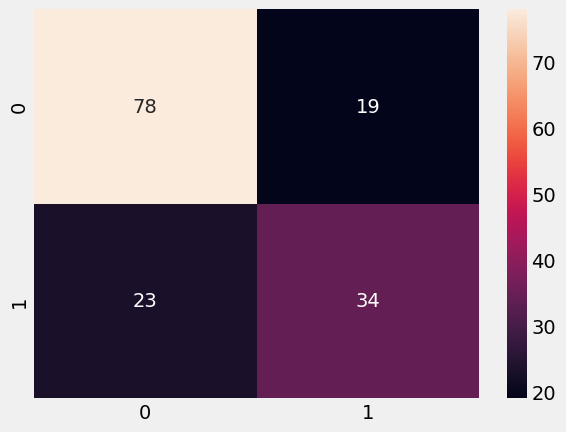

In [ ]:
cal(model4)

In [ ]:
col

['LogisticRegression ,SVC,RandomForestClassifier,GradientBoostingClassifier']

In [ ]:
FinalResult=pd.DataFrame({"accuricies":result1,"recall":result2,"fScore":result3})
FinalResult

,accuricies,recall,fScore
0,0.785714,0.700000,0.679612
1,0.753247,0.674419,0.604167
2,0.753247,0.666667,0.612245
3,0.727273,0.596491,0.618182
